# Exploring Security Practices in Infrastructure as Code: An Empirical Study of AWS Terraform Configurations

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
#plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.family"] = "Arial"
plt.rcParams['figure.dpi'] = 300

In [72]:
RESULTS_FILE_AWS = "./csv/results.csv"
RESULTS_FILE_TFSEC = "./csv/results-tfsec.csv"
POLICIES_FILE = "./csv/policies-aws-final.csv"

In [73]:
policies_tfsec = {}
policies_checkov = {}
with open(POLICIES_FILE, 'r') as f:
    f.readline()
    policies_rows = f.readlines()
    for row in policies_rows:
        s_row = row.split(',')
        if s_row[7] != "-" and s_row[8] != "-" and s_row[9] == "":
            policy_id = s_row[0]
            pol_tfsec = s_row[7]
            pol_checkov = s_row[8]

            policies_tfsec[policy_id] = pol_tfsec.split(',')
            policies_checkov[policy_id] = pol_checkov.split(',')

print(policies_tfsec)
print(policies_checkov)

{'POL01': ['AVD-AWS-0137'], 'POL02': ['AVD-AWS-0138'], 'POL05': ['AVD-AWS-0057'], 'POL06': ['AVD-AWS-0141'], 'POL09': ['AVD-AWS-0076'], 'POL11': ['AVD-AWS-0026'], 'POL12': ['AVD-AWS-0027'], 'POL13': ['AVD-AWS-0084'], 'POL14': ['AVD-AWS-0127'], 'POL15': ['AVD-AWS-0131'], 'POL16': ['AVD-AWS-0008'], 'POL17': ['AVD-AWS-0026'], 'POL18': ['AVD-AWS-0028'], 'POL19': ['AVD-AWS-0130'], 'POL22': ['AVD-AWS-0105'], 'POL23': ['AVD-AWS-0107'], 'POL24': ['AVD-AWS-0009'], 'POL25': ['AVD-AWS-0164'], 'POL26': ['AVD-AWS-0129'], 'POL27': ['AVD-AWS-0029'], 'POL28': ['AVD-AWS-0122'], 'POL29': ['AVD-AWS-0027'], 'POL30': ['AVD-AWS-0133'], 'POL32': ['AVD-AWS-0079'], 'POL34': ['AVD-AWS-0082'], 'POL35': ['AVD-AWS-0037'], 'POL37': ['AVD-AWS-0039'], 'POL38': ['AVD-AWS-0040'], 'POL39': ['AVD-AWS-0041'], 'POL41': ['AVD-AWS-0048'], 'POL42': ['AVD-AWS-0042'], 'POL43': ['AVD-AWS-0043'], 'POL44': ['AVD-AWS-0046'], 'POL46': ['AVD-AWS-0096'], 'POL47': ['AVD-AWS-0097'], 'POL48': ['AVD-AWS-0135'], 'POL49': ['AVD-AWS-0134'], 

In [74]:
results_tfsec = {}
results_checkov = {}
with open(RESULTS_FILE_TFSEC, 'r') as f:
    f.readline()
    policies_rows = f.readlines()
    for row in policies_rows:
        s_row = row.split(',')
        repo_name = s_row[0]
        passed_check = s_row[3].split(";")
        failed_check = s_row[4].split(";")

        results_tfsec[repo_name] = [passed_check, failed_check]

with open(RESULTS_FILE_AWS, 'r') as f:
    f.readline()
    policies_rows = f.readlines()
    for row in policies_rows:
        s_row = row.split(',')
        repo_name = s_row[0]
        passed_check = s_row[3].split(";")
        failed_check = s_row[4].split(";")

        results_checkov[repo_name] = [passed_check, failed_check]


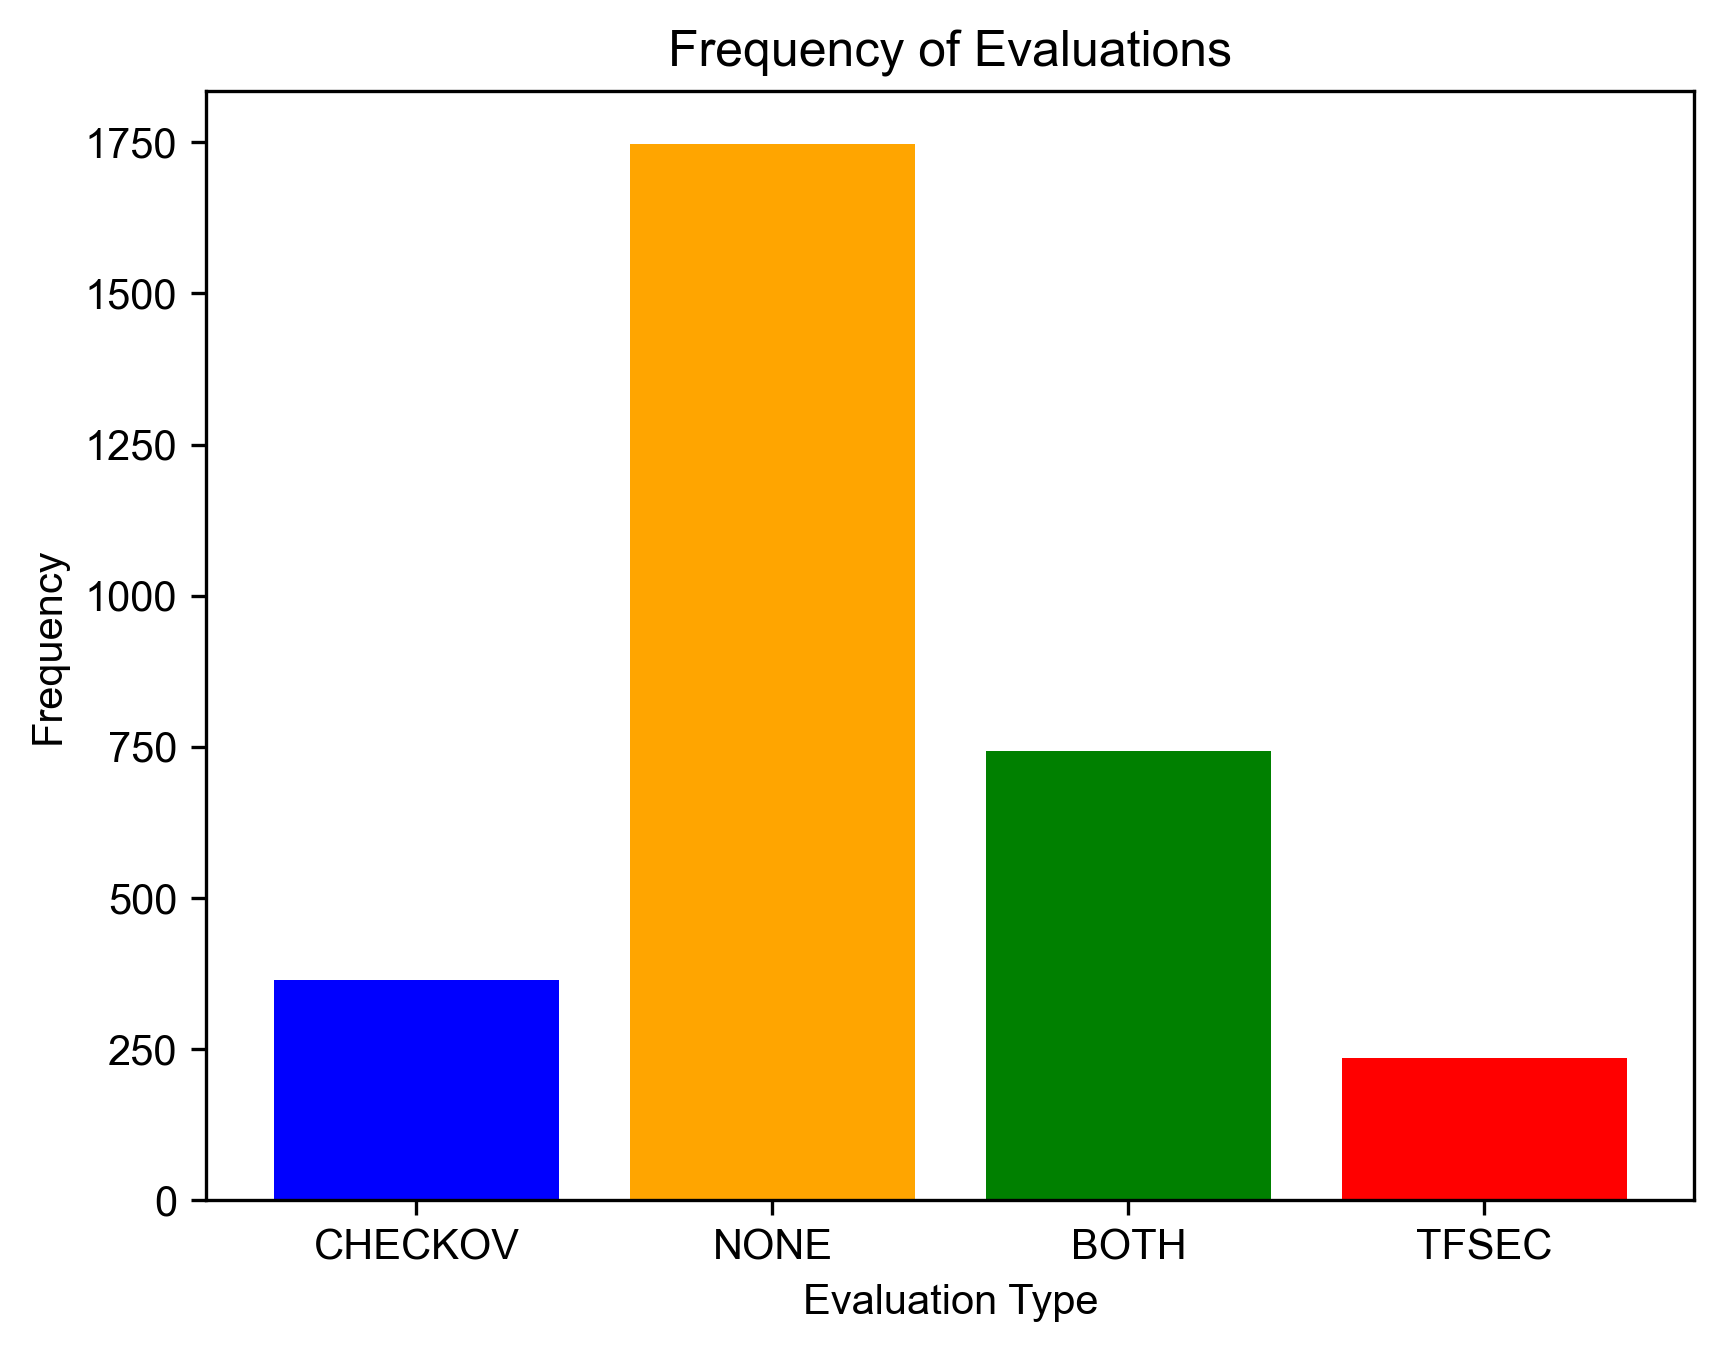

In [75]:
output = []
for project in results_checkov:
    result_project_tfsec = results_tfsec.get(project)
    result_project_checkov = results_checkov.get(project)
    if result_project_tfsec is not None and result_project_checkov is not None:
        for policy in policies_tfsec:
            tfsec_pol_id = policies_tfsec.get(policy)[0]
            checkov_pol_id = policies_checkov.get(policy)[0]
            evaluation = ""
            if checkov_pol_id in result_project_checkov[0] and tfsec_pol_id in result_project_tfsec[0]:
                evaluation = "BOTH"
            if checkov_pol_id in result_project_checkov[0] and tfsec_pol_id in result_project_tfsec[1]:
                evaluation = "CHECKOV"
            if checkov_pol_id in result_project_checkov[1] and tfsec_pol_id in result_project_tfsec[0]:
                evaluation = "TFSEC"
            if checkov_pol_id in result_project_checkov[1] and tfsec_pol_id in result_project_tfsec[1]:
                evaluation = "NONE"

            if evaluation != "":
                output.append([project, policy, evaluation])

import matplotlib.pyplot as plt

# Count the frequency of each evaluation
evaluation_counts = {}
for project_name, policy_id, evaluation in output:
    if evaluation in evaluation_counts:
        evaluation_counts[evaluation] += 1
    else:
        evaluation_counts[evaluation] = 1

# Prepare data for plotting
evaluations = list(evaluation_counts.keys())
counts = list(evaluation_counts.values())

# Create the bar chart
plt.bar(evaluations, counts, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Evaluation Type')
plt.ylabel('Frequency')
plt.title('Frequency of Evaluations')
plt.show()


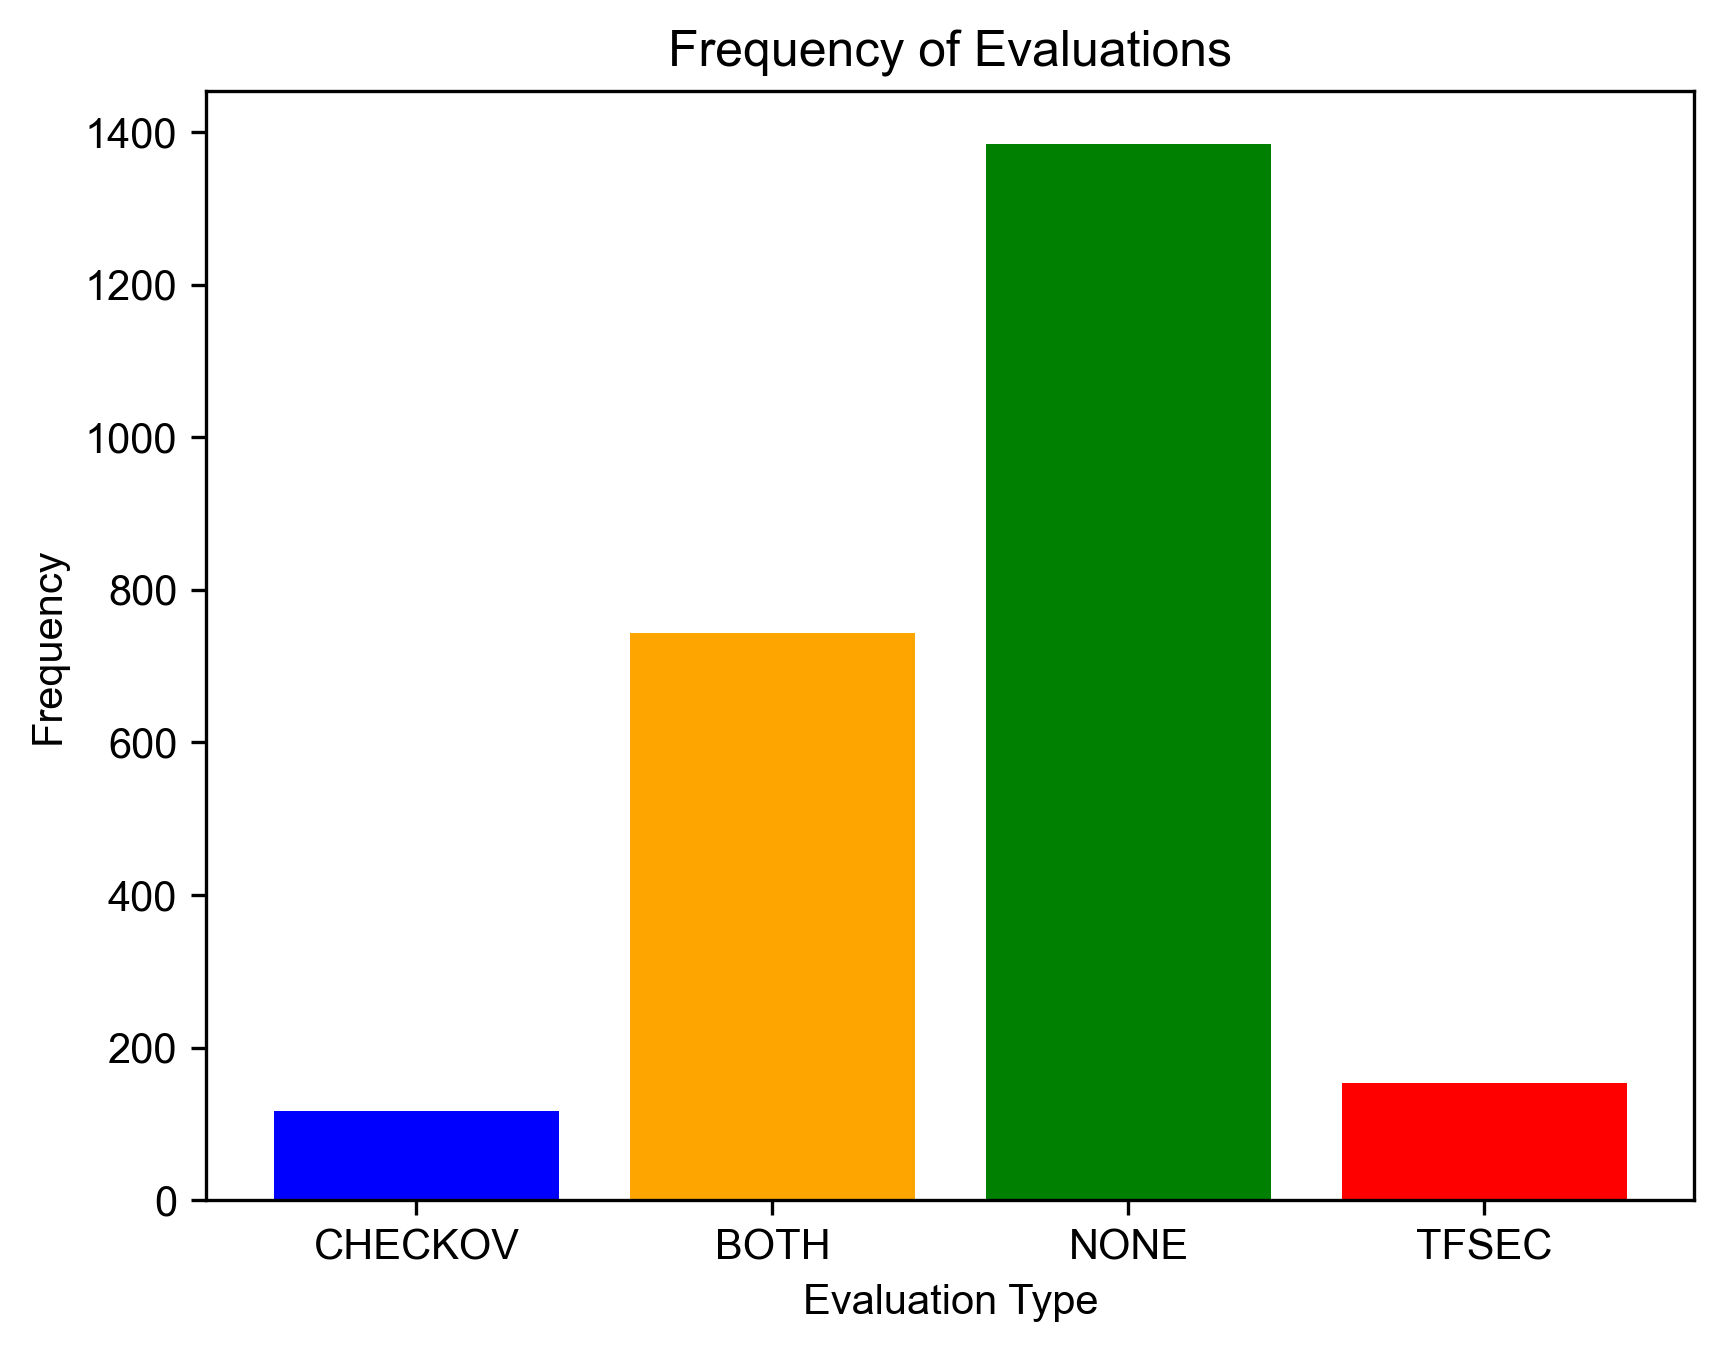

CSV file 'project_data.csv' has been created.


In [76]:
results_tfsec = {}
results_checkov = {}
with open(RESULTS_FILE_TFSEC, 'r') as f:
    f.readline()
    policies_rows = f.readlines()
    for row in policies_rows:
        s_row = row.split(',')
        repo_name = s_row[0]
        passed_check = s_row[3].split(";")
        failed_check = s_row[4].split(";")

        results_tfsec[repo_name] = [passed_check, failed_check]

with open(RESULTS_FILE_AWS, 'r') as f:
    f.readline()
    policies_rows = f.readlines()
    for row in policies_rows:
        s_row = row.split(',')
        repo_name = s_row[0]
        passed_check = s_row[3].split(";")
        failed_check = s_row[4].split(";")

        results_checkov[repo_name] = [passed_check, failed_check]

output = []
for project in results_checkov:
    result_project_tfsec = results_tfsec.get(project)
    result_project_checkov = results_checkov.get(project)
    if result_project_tfsec is not None and result_project_checkov is not None:
        for policy in policies_tfsec:
            tfsec_pol_id = policies_tfsec.get(policy)[0]
            checkov_pol_id = policies_checkov.get(policy)[0]
            evaluation = ""
            if (checkov_pol_id in result_project_checkov[0] and not checkov_pol_id in result_project_checkov[1]) \
                    and (tfsec_pol_id in result_project_tfsec[0] and not tfsec_pol_id in result_project_tfsec[1]):
                evaluation = "BOTH"
            if (checkov_pol_id in result_project_checkov[0] and not checkov_pol_id in result_project_checkov[1]) \
                        and (tfsec_pol_id in result_project_tfsec[1] and not tfsec_pol_id in result_project_tfsec[0]):
                evaluation = "CHECKOV"
            if (checkov_pol_id in result_project_checkov[1] and not checkov_pol_id in result_project_checkov[0]) \
                    and (tfsec_pol_id in result_project_tfsec[0] and not tfsec_pol_id in result_project_tfsec[1]):
                evaluation = "TFSEC"
            if (checkov_pol_id in result_project_checkov[1] and not checkov_pol_id in result_project_checkov[0]) \
                    and (tfsec_pol_id in result_project_tfsec[1] and not tfsec_pol_id in result_project_tfsec[0]):
                evaluation = "NONE"

            if evaluation != "":
                output.append([project, policy, evaluation])

import matplotlib.pyplot as plt

# Count the frequency of each evaluation
evaluation_counts = {}
for project_name, policy_id, evaluation in output:
    if evaluation in evaluation_counts:
        evaluation_counts[evaluation] += 1
    else:
        evaluation_counts[evaluation] = 1

# Prepare data for plotting
evaluations = list(evaluation_counts.keys())
counts = list(evaluation_counts.values())

# Create the bar chart
plt.bar(evaluations, counts, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Evaluation Type')
plt.ylabel('Frequency')
plt.title('Frequency of Evaluations')
plt.show()

import csv

with open('./csv/distribution_by_coverage_aws.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Write header
    writer.writerow(['Project Name', 'Policy ID', 'Evaluation'])

    # Write data
    writer.writerows(output)

print("CSV file 'distribution_by_coverage_aws.csv' has been created.")